In [15]:
#Pitch model
#V1.0 04/04/2020
    #Reads BHPA test rig files and plots them
    #Curve fits a polynomial to 2D CL data (i.e AoA only, no account of speed)
    
#V1.1 07/04/2020
    #Curve fits a polynomial to 3D CL data (i.e AoA and speed)
    #Curve fits a single value of parasitic drag to CL
    
#V1.2 08/04/2020
    #Calculation of CD0 done using airspeed as polynomial function.
    
#V1.3 08/04/2020
    #Calculation of CD and CM parameters just done as a 3D polynomial fit - works much better like this and simpler
    
#V2.0 08/04/2020
    #Includes glider object
    #Can save and load 'gliders'
    #Gives absolute lift, drag and moment
    #Changed speeds from kph into m/s

In [16]:
import pitch_model
import numpy as np
#raw = Logfiles('test_data/raw/')
corr_Co = pitch_model.Logfiles('test_data/corr-Co/')
corr_LDM = pitch_model.Logfiles('test_data/corr-LDM/')

In [17]:
puma = pitch_model.Glider()
puma.load_glider('PUMA')
puma.glider_specs()

Name:  Puma 13.5
Span:  9.63
Area:  13.5
CL constants(VG tight):  [-4.02046022e-06  1.48815541e-04  5.12823404e-02  7.19915002e+05
 -5.36443878e-05  2.68780471e-03 -4.36855178e-02 -7.19914676e+05]
CL constants(VG loose):  [ 8.34706175e-06  2.99051978e-04  3.54592535e-02 -6.14583392e+05
 -1.12528052e-04  5.89914193e-03 -1.04038735e-01  6.14583968e+05]
CD constants(VG tight):  [-5.64062584e-06  2.24399137e-04 -7.83706231e-04  7.19914949e+05
 -2.36866327e-05  1.55652012e-03 -3.15897097e-02 -7.19914729e+05]
CD constants(VG tight):  [-3.03381179e-07  1.58139052e-04 -2.03636099e-03  6.14583757e+05
 -1.64126377e-05  1.06479887e-03 -2.05494693e-02 -6.14583603e+05]
CM constants(VG tight):  [-3.20557314e-06  1.04413604e-04  2.39197913e-03 -7.19914833e+05
  2.05840158e-05 -8.37971098e-04  9.35922468e-03  7.19914845e+05]
CM constants(VG tight):  [-5.97923764e-06  1.09451575e-04  1.31417092e-03  6.14583766e+05
 -1.06714660e-05  8.08573857e-04 -1.81357156e-02 -6.14583594e+05]


In [18]:
corr_LDM.vboff_data.iloc[:5]

,ASI/km/h,Keel_Angle/deg,Lift/N,Drag/N,Force/N,Moment/NM,V
,,,,,,,
2000-06-01 13:57:00.060,33.9,22.3,853.5,41.1,854.4,89.1,9.416667
2000-06-01 13:57:00.170,34.9,22.1,786.9,20.4,787.2,57.8,9.694444
2000-06-01 13:57:00.280,33.5,22.1,820.1,62.5,822.4,71.5,9.305556
2000-06-01 13:57:00.370,34.4,22.1,826.6,59.0,828.8,78.0,9.555556
2000-06-01 13:57:00.480,33.9,22.3,835.0,4.2,835.0,50.4,9.416667


In [19]:
corr_Co.calc_CL()
corr_Co.calc_CD()
corr_Co.calc_CM()

Calculating CL vbon....
C values:  [-4.02046022e-06  1.48815541e-04  5.12823404e-02  7.19915002e+05
 -5.36443878e-05  2.68780471e-03 -4.36855178e-02 -7.19914676e+05]
C sigma:  [1.74819555e-06 1.98435291e-05 4.24989250e-04 9.51038385e+04
 1.12255883e-05 6.08814302e-04 1.04083391e-02 9.51038378e+04]
C sigma/values:  [-0.43482473  0.13334312  0.00828724  0.13210426 -0.20925932  0.22650987
 -0.23825605 -0.13210432]
Mean variance:  -0.06427499119528253
Calculating CL vboff....
C values:  [ 8.34706175e-06  2.99051978e-04  3.54592535e-02 -6.14583392e+05
 -1.12528052e-04  5.89914193e-03 -1.04038735e-01  6.14583968e+05]
C sigma:  [1.88345020e-06 2.86831745e-05 5.24204634e-04            nan
 1.96302265e-05 9.97319665e-04 1.59064917e-02            nan]
C sigma/values:  [ 0.2256423   0.09591368  0.0147833          nan -0.1744474   0.16906182
 -0.15289009         nan]
Mean variance:  nan
Calculating CD vbon....
C values:  [-5.64062584e-06  2.24399137e-04 -7.83706231e-04  7.19914949e+05
 -2.36866327

/home/mt1tjs/project7/Kinematic/pitch_model.py:186: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(pcov))


In [20]:
corr_Co.save_glider('PUMA', 'Puma 13.5', 9.63, 13.5)

In [21]:
L,D,M = puma.calc_LDM(15,11.1,True)
L,D,M

(904.3088354412746, 49.07664537287536, 127.16465214476432)

In [22]:
L_vbon, D_vbon, M_vbon = puma.calc_LDM(corr_Co.vbon_data['Keel_Angle/deg'],corr_Co.vbon_data['V'],True)
L_vboff, D_vboff, M_vboff = puma.calc_LDM(corr_Co.vboff_data['Keel_Angle/deg'],corr_Co.vboff_data['V'],False)
#L_vboff

In [23]:
corr_LDM.vbon_indices

[0, 204, 558, 824, 944, 1104]

In [24]:
corr_LDM.vboff_indices

[0, 194, 351, 560, 707]

<IPython.core.display.Javascript object>


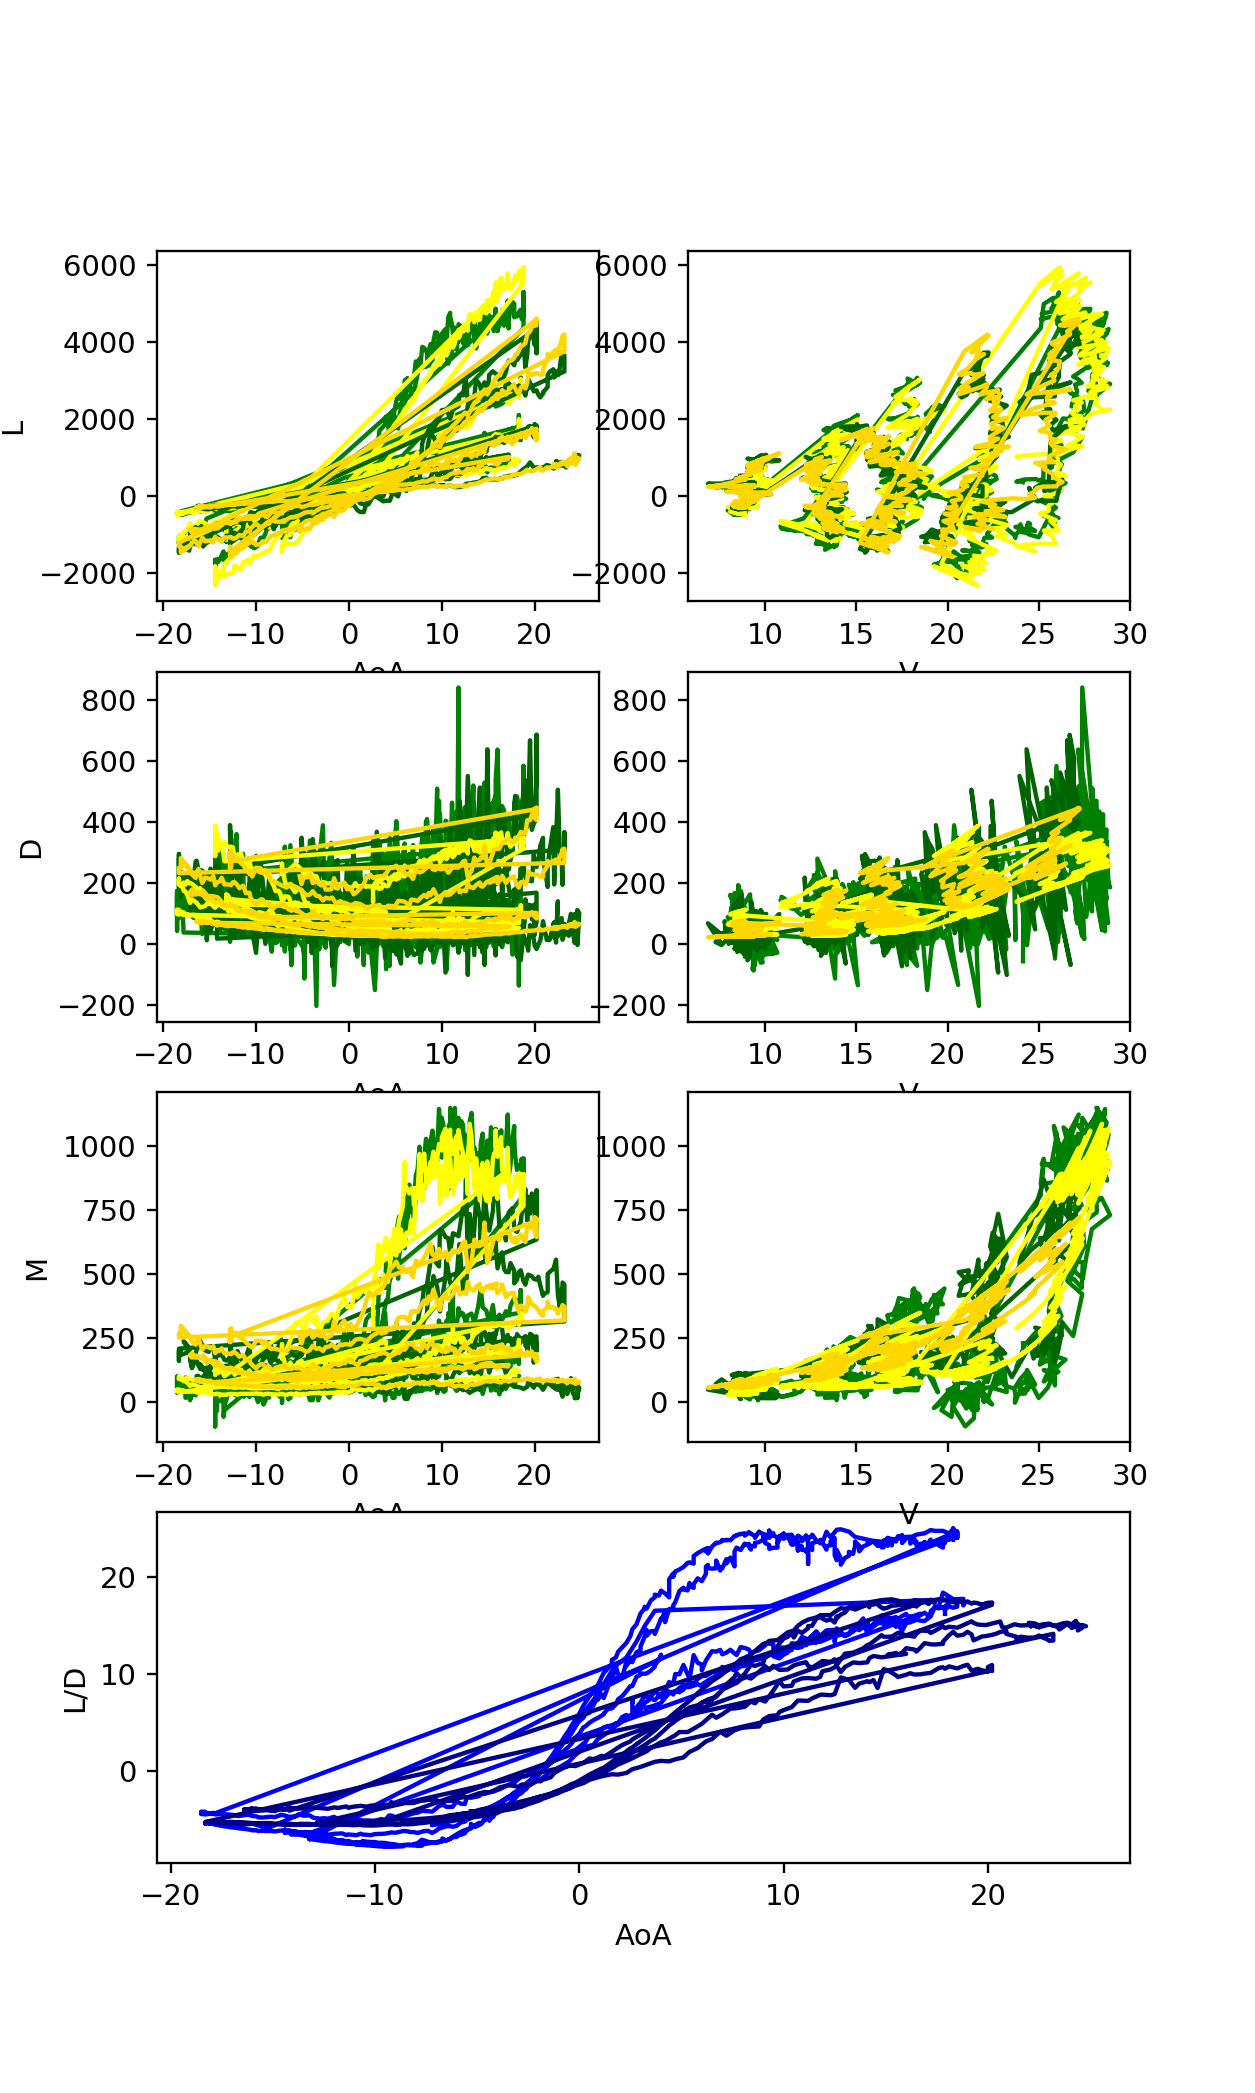

In [25]:
from matplotlib import pyplot as plt
%matplotlib notebook

plt.figure(figsize=(6,10), dpi=150)

#data_raw = raw.vboff_data
data_LDM = corr_LDM.vboff_data
vbon_data = corr_LDM.vbon_data.iloc[:]
vboff_data = corr_LDM.vboff_data.iloc[:]

CLA = plt.subplot(421)
plt.plot(vbon_data['Keel_Angle/deg'],vbon_data['Lift/N'], color ='green')
plt.plot(vbon_data['Keel_Angle/deg'],L_vbon, color ='yellow')
plt.plot(vboff_data['Keel_Angle/deg'],vboff_data['Lift/N'], color ='darkgreen')
plt.plot(vboff_data['Keel_Angle/deg'],L_vboff, color ='gold')
plt.xlabel('AoA')
plt.ylabel('L')

CDA = plt.subplot(423)
plt.plot(vbon_data['Keel_Angle/deg'],vbon_data['Drag/N'], color ='green')
plt.plot(vboff_data['Keel_Angle/deg'],vboff_data['Drag/N'], color ='darkgreen')
plt.plot(vbon_data['Keel_Angle/deg'],D_vbon, color ='yellow')
plt.plot(vboff_data['Keel_Angle/deg'],D_vboff, color ='gold')
plt.xlabel('AoA')
plt.ylabel('D')

CM = plt.subplot(425)
plt.plot(vbon_data['Keel_Angle/deg'],vbon_data['Moment/NM'], color ='green')
plt.plot(vboff_data['Keel_Angle/deg'],vboff_data['Moment/NM'], color ='darkgreen')
plt.plot(vbon_data['Keel_Angle/deg'],M_vbon, color ='yellow')
plt.plot(vboff_data['Keel_Angle/deg'],M_vboff, color ='gold')
plt.xlabel('AoA')
plt.ylabel('M')

LD = plt.subplot(414)
plt.plot(vbon_data['Keel_Angle/deg'],L_vbon/D_vbon, color ='blue')
plt.plot(vboff_data['Keel_Angle/deg'],L_vboff/D_vboff, color ='darkblue')
plt.xlabel('AoA')
plt.ylabel('L/D')

CLV = plt.subplot(422)
plt.plot(vbon_data['V'],vbon_data['Lift/N'], color ='green')
plt.plot(vbon_data['V'],L_vbon, color ='yellow')
plt.plot(vboff_data['V'],vboff_data['Lift/N'], color ='darkgreen')
plt.plot(vboff_data['V'],L_vboff, color ='gold')
plt.xlabel('V')

CDV = plt.subplot(424)
plt.plot(vbon_data['V'],vbon_data['Drag/N'], color ='green')
plt.plot(vboff_data['V'],vboff_data['Drag/N'], color ='darkgreen')
plt.plot(vbon_data['V'],D_vbon, color ='yellow')
plt.plot(vboff_data['V'],D_vboff, color ='gold')
plt.xlabel('V')

CM = plt.subplot(426)
plt.plot(vbon_data['V'],vbon_data['Moment/NM'], color ='green')
plt.plot(vboff_data['V'],vboff_data['Moment/NM'], color ='darkgreen')
plt.plot(vbon_data['V'],M_vbon, color ='yellow')
plt.plot(vboff_data['V'],M_vboff, color ='gold')
plt.xlabel('V')

plt.show()
#data

<IPython.core.display.Javascript object>


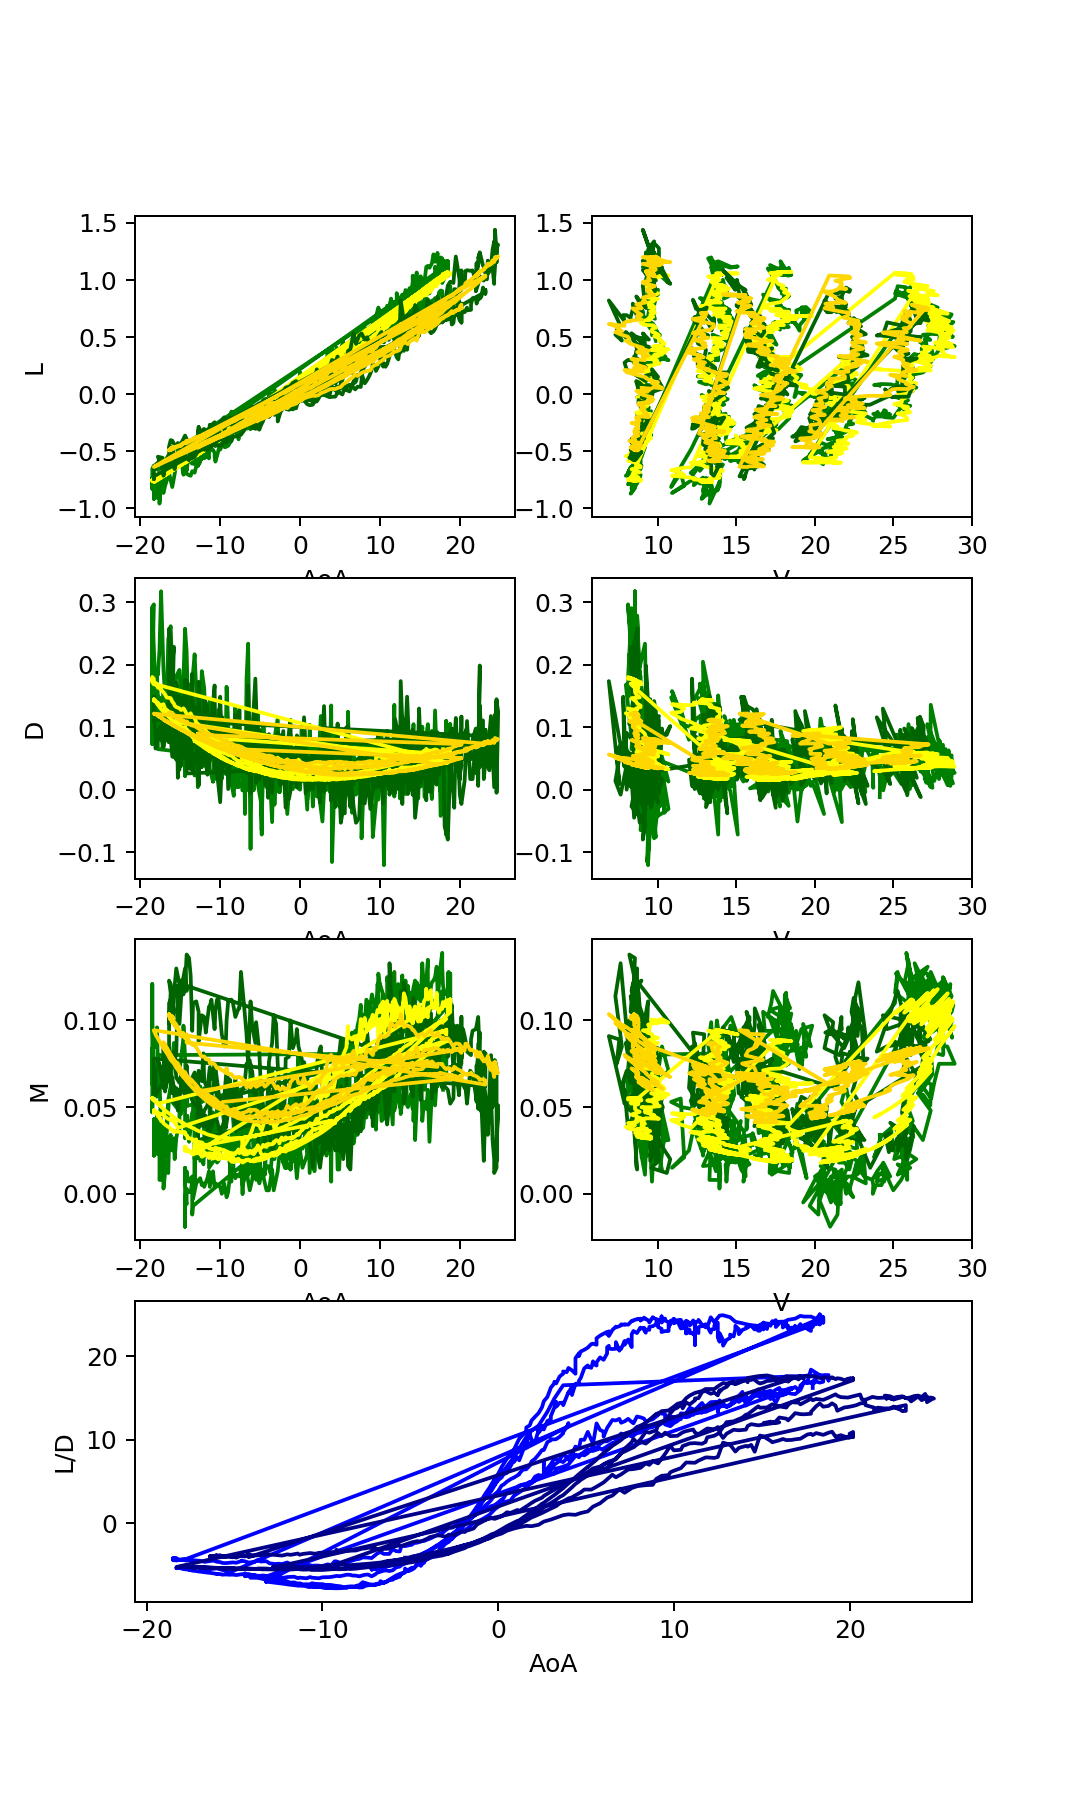

In [15]:
from matplotlib import pyplot as plt
%matplotlib notebook

plt.figure(figsize=(6,10), dpi=150)

#data_raw = raw.vboff_data
data_LDM = corr_LDM.vboff_data
vbon_data_Co = corr_Co.vbon_data.iloc[:]
vboff_data_Co = corr_Co.vboff_data.iloc[:]

CLA = plt.subplot(421)
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CL'], color ='green')
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CL_calc'], color ='yellow')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CL'], color ='darkgreen')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CL_calc'], color ='gold')
plt.xlabel('AoA')
plt.ylabel('L')

CDA = plt.subplot(423)
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CD'], color ='green')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CD'], color ='darkgreen')
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CD_calc'], color ='yellow')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CD_calc'], color ='gold')
plt.xlabel('AoA')
plt.ylabel('D')

CM = plt.subplot(425)
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CM'], color ='green')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CM'], color ='darkgreen')
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CM_calc'], color ='yellow')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CM_calc'], color ='gold')
plt.xlabel('AoA')
plt.ylabel('M')

LD = plt.subplot(414)
plt.plot(vbon_data_Co['Keel_Angle/deg'],vbon_data_Co['CL_calc']/vbon_data_Co['CD_calc'], color ='blue')
plt.plot(vboff_data_Co['Keel_Angle/deg'],vboff_data_Co['CL_calc']/vboff_data_Co['CD_calc'], color ='darkblue')
plt.xlabel('AoA')
plt.ylabel('L/D')

CLV = plt.subplot(422)
plt.plot(vbon_data_Co['V'],vbon_data_Co['CL'], color ='green')
plt.plot(vbon_data_Co['V'],vbon_data_Co['CL_calc'], color ='yellow')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CL'], color ='darkgreen')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CL_calc'], color ='gold')
plt.xlabel('V')

CDV = plt.subplot(424)
plt.plot(vbon_data_Co['V'],vbon_data_Co['CD'], color ='green')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CD'], color ='darkgreen')
plt.plot(vbon_data_Co['V'],vbon_data_Co['CD_calc'], color ='yellow')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CD_calc'], color ='gold')
plt.xlabel('V')

CM = plt.subplot(426)
plt.plot(vbon_data_Co['V'],vbon_data_Co['CM'], color ='green')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CM'], color ='darkgreen')
plt.plot(vbon_data_Co['V'],vbon_data_Co['CM_calc'], color ='yellow')
plt.plot(vboff_data_Co['V'],vboff_data_Co['CM_calc'], color ='gold')
plt.xlabel('V')

plt.show()
#data

<IPython.core.display.Javascript object>


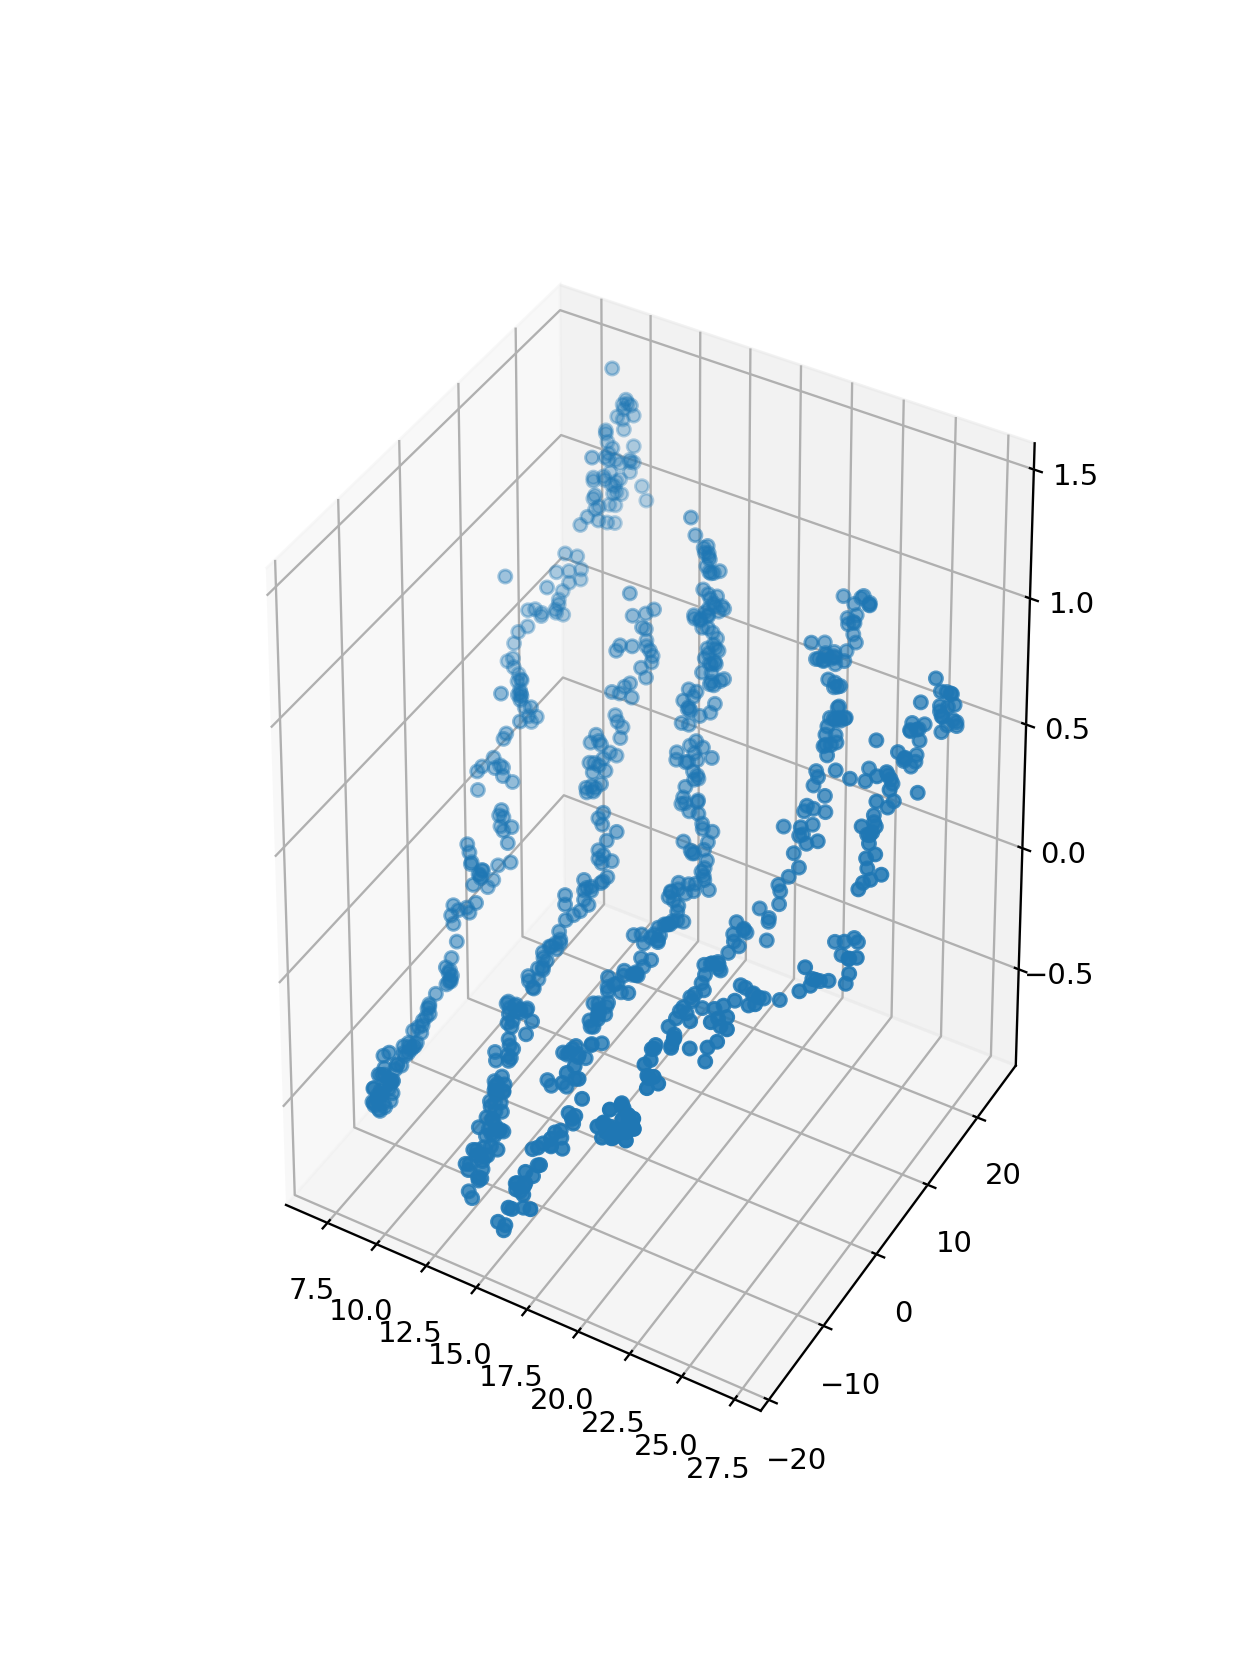

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(6,8), dpi=150)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(corr_Co.vboff_data['V'],corr_Co.vboff_data['Keel_Angle/deg'],corr_Co.vboff_data['CL'])
#x = corr_Co.vboff_data['Keel_Angle/deg']
#y = corr_Co.vboff_data['ASI/km/h']
#z = corr_Co.vboff_data['CL']
#x = np.full((len(y), len(x)), np.array([x]))
#y = np.full((len(x), len(y)), np.array([y]))
#y = np.transpose(y)
#y = y[:,:len(x[0])]

#ax.plot_surface(x, y, z, cmap='coolwarm')

In [31]:
AoA = np.arange(-20.0,25.0,0.5)
V = np.arange (1, 27.5, 0.5)
AoAmat = np.full((len(V), len(AoA)),np.full_like(AoA,AoA))
Vmat = np.full((len(AoA), len(V)),np.full_like(V,V))
Vmat = np.transpose(Vmat)

CL, CD, CM = puma.calc_Co(AoAmat,Vmat, True)
CL_vboff, CD_vboff, CM_vboff = puma.calc_Co(AoAmat,Vmat, False)

L_vbon, D_vbon, M_vbon = puma.calc_LDM(AoAmat,Vmat, True)
L_vboff, D_vboff, M_vboff = puma.calc_LDM(AoAmat,Vmat, False)

np.shape(L_vbon)

(53, 90)

In [27]:
from scipy.optimize import curve_fit

V = np.arange (10, 27.5, 0.5)

def polar_vbon(V, AoA):
    L,D,M = puma.calc_LDM(AoA,V, True)
    return L

def polar_vboff(V, AoA):
    L,D,M = puma.calc_LDM(AoA,V, False)
    return L


load = 1177
min_clipin = 1002
max_clipin = 1447
AoA_vbon=[]
AoA_min = []
AoA_max = []
AoA_vboff =[]

for i in range(0,len(V)):
    popt,pcov = curve_fit(polar_vbon, V[i], load)
    AoA_vbon.append(popt[0])
    popt,pcov = curve_fit(polar_vboff, V[i], load)
    AoA_vboff.append(popt[0])
    popt,pcov = curve_fit(polar_vbon, V[i], min_clipin)
    AoA_min.append(popt[0])
    popt,pcov = curve_fit(polar_vbon, V[i], max_clipin)
    AoA_max.append(popt[0])

L_vbon, D_vbon, M_vbon = puma.calc_LDM(AoA_vbon,V, True)
L_min, D_min, M_min = puma.calc_LDM(AoA_min,V, True)
L_max, D_max, M_max = puma.calc_LDM(AoA_max,V, True)
L_vboff, D_vboff, M_vboff = puma.calc_LDM(AoA_vboff,V, False)


V_vert_vbon = -(V/(L_vbon/D_vbon))
V_vert_min = -(V/(L_min/D_min))
V_vert_max = -(V/(L_max/D_max))
V_vert_vboff = -(V/(L_vboff/D_vboff))

print('Max L/D VG tight (92kg):', np.max(L_vbon/D_vbon))
print('Max L/D VG tight (75kg):', np.max(L_min/D_min))
print('Max L/D VG tight (120kg):', np.max(L_max/D_max))
print('Max L/D VG loose (92kg):', np.max(L_vboff/D_vboff))

Max L/D VG tight (92kg): 24.846148824473826
Max L/D VG tight (75kg): 24.254733053439292
Max L/D VG tight (120kg): 30.78204376682685
Max L/D VG loose (92kg): 17.798707637536086


/home/mt1tjs/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [28]:
np.max(V_vert_max)

-0.32486471904691355

<IPython.core.display.Javascript object>


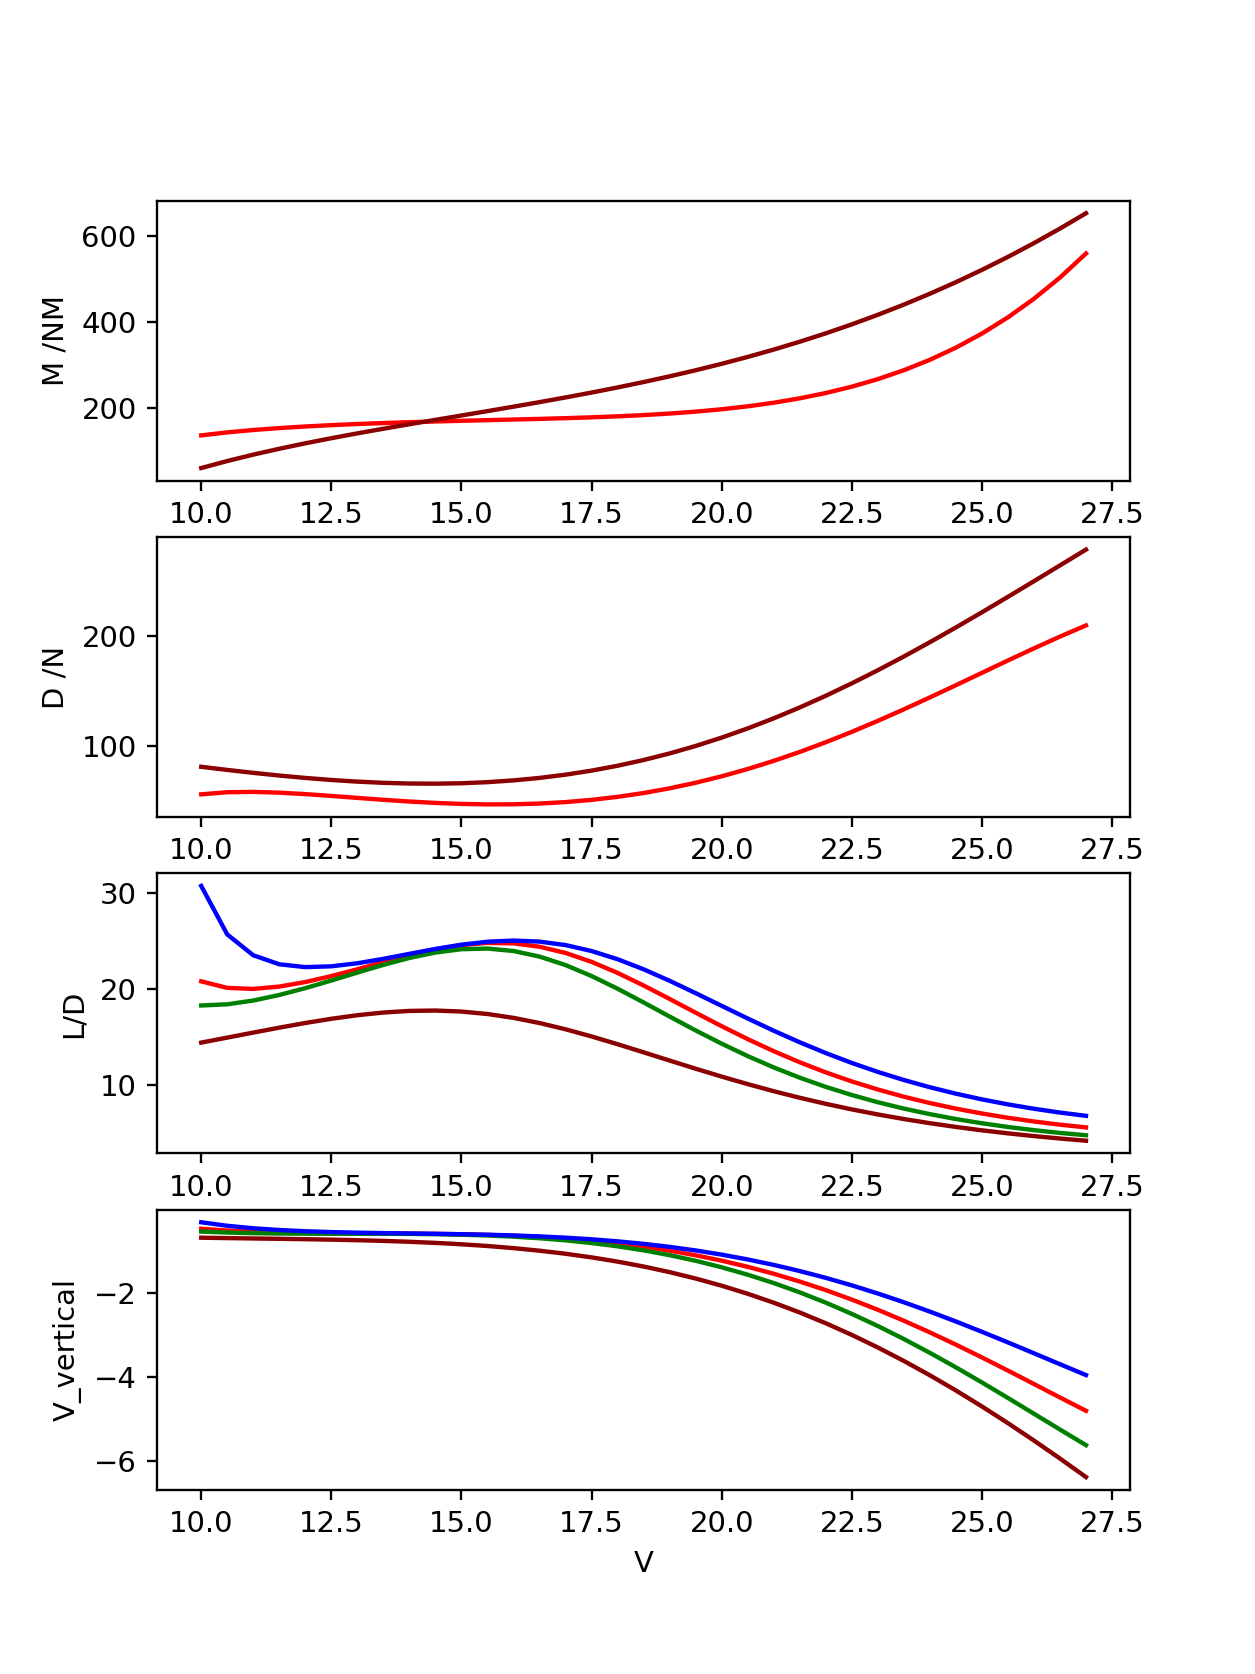

Text(0,0.5,'V_vertical')

In [29]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

plt.figure(figsize=(6,8), dpi=150)
AoA = plt.subplot(411)
plt.plot(V, M_vbon, color ='red')
plt.plot(V, M_vboff, color ='darkred')
plt.xlabel('V')
plt.ylabel('M /NM')

AoA = plt.subplot(412)
plt.plot(V, D_vbon, color ='red')
plt.plot(V, D_vboff, color ='darkred')
plt.xlabel('V')
plt.ylabel('D /N')

AoA = plt.subplot(413)
plt.plot(V, L_vbon/D_vbon, color ='red')
plt.plot(V, L_vboff/D_vboff, color ='darkred')
plt.plot(V, L_min/D_min, color ='green')
plt.plot(V, L_max/D_max, color ='blue')
plt.xlabel('V')
plt.ylabel('L/D')

AoA = plt.subplot(414)
plt.plot(V, V_vert_vbon, color ='red')
plt.plot(V, V_vert_vboff, color ='darkred')
plt.plot(V, V_vert_min, color ='green')
plt.plot(V, V_vert_max, color ='blue')
plt.xlabel('V')
plt.ylabel('V_vertical')

<IPython.core.display.Javascript object>


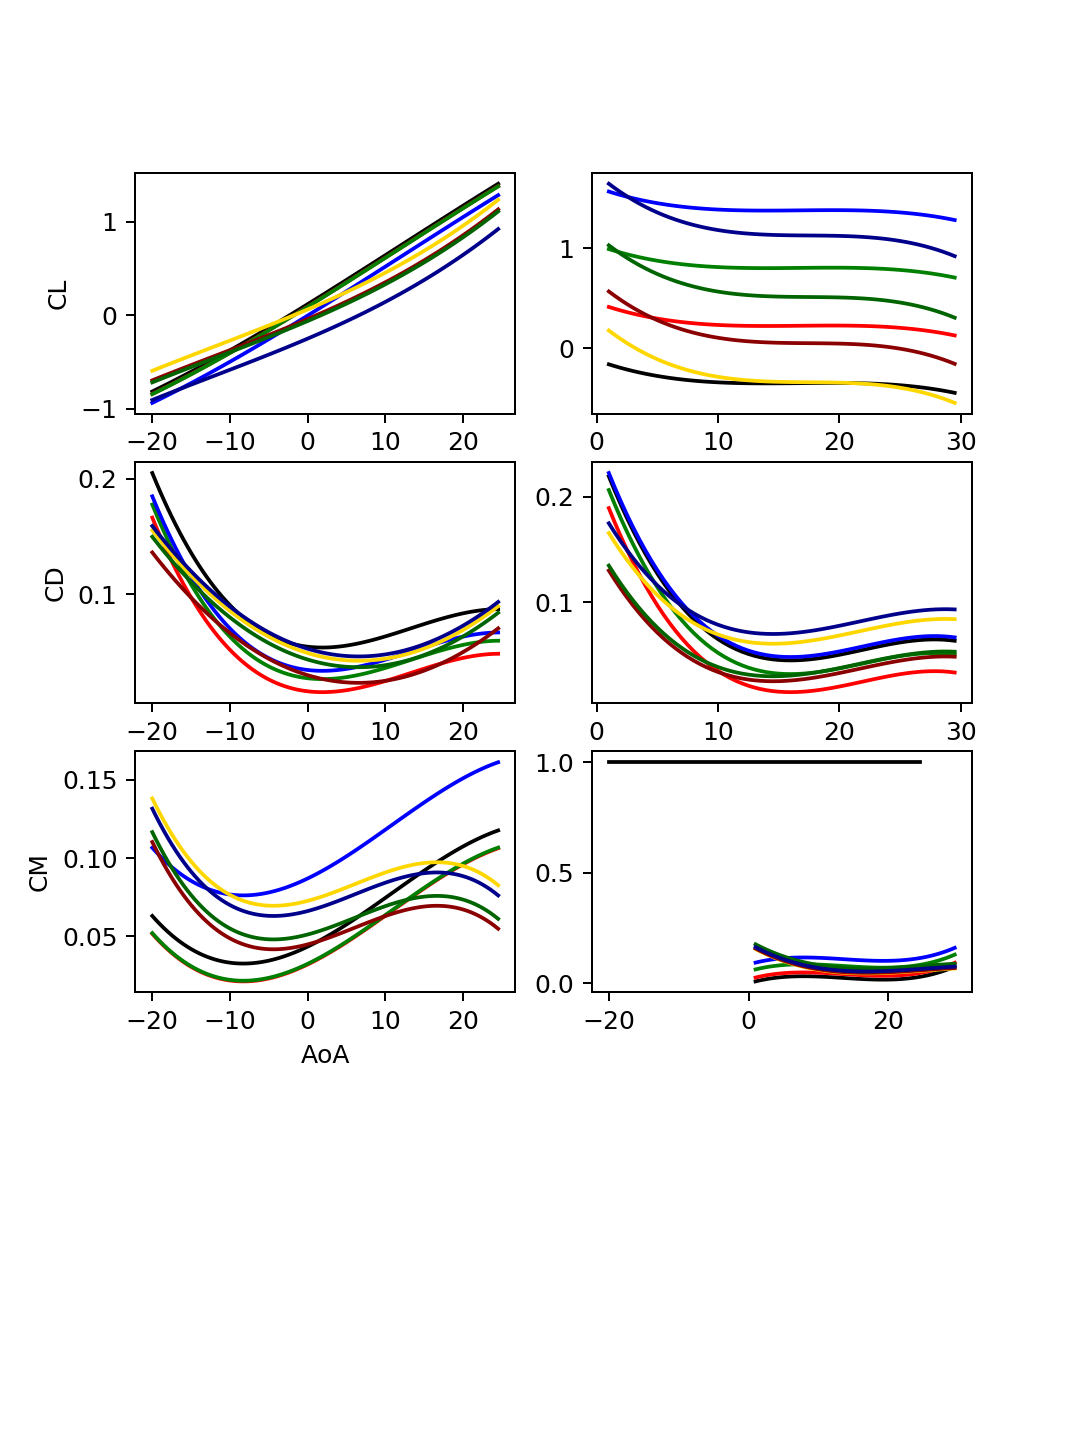

/home/mt1tjs/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [31]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

plt.figure(figsize=(6,8), dpi=150)
CLAoA = plt.subplot(421)
plt.plot(AoA,CL[int(len(V)/4),:], color ='black')
plt.plot(AoA,CL[int(len(V)/2),:], color ='red')
plt.plot(AoA,CL[int(len(V)*3/4),:], color ='green')
plt.plot(AoA,CL[int(len(V)-1),:], color ='blue')
plt.plot(AoA,CL_vboff[int(len(V)/4),:], color ='gold')
plt.plot(AoA,CL_vboff[int(len(V)/2),:], color ='darkred')
plt.plot(AoA,CL_vboff[int(len(V)*3/4),:], color ='darkgreen')
plt.plot(AoA,CL_vboff[int(len(V)-1),:], color ='darkblue')
plt.xlabel('AoA')
plt.ylabel('CL')

CDAoA = plt.subplot(423)
plt.plot(AoA,CD[int(len(V)/4),:], color ='black')
plt.plot(AoA,CD[int(len(V)/2),:], color ='red')
plt.plot(AoA,CD[int(len(V)*3/4),:], color ='green')
plt.plot(AoA,CD[len(V)-1,:], color ='blue')
plt.plot(AoA,CD_vboff[int(len(V)/4),:], color ='gold')
plt.plot(AoA,CD_vboff[int(len(V)/2),:], color ='darkred')
plt.plot(AoA,CD_vboff[int(len(V)*3/4),:], color ='darkgreen')
plt.plot(AoA,CD_vboff[len(V)-1,:], color ='darkblue')
plt.xlabel('AoA')
plt.ylabel('CD')

CMAoA = plt.subplot(425)
plt.plot(AoA,CM[int(len(V)/4),:], color ='black')
plt.plot(AoA,CM[int(len(V)/2),:], color ='red')
plt.plot(AoA,CM[int(len(V)*3/4),:], color ='green')
plt.plot(AoA,CM[int(len(V)-1),:], color ='blue')
plt.plot(AoA,CM_vboff[int(len(V)/4),:], color ='gold')
plt.plot(AoA,CM_vboff[int(len(V)/2),:], color ='darkred')
plt.plot(AoA,CM_vboff[int(len(V)*3/4),:], color ='darkgreen')
plt.plot(AoA,CM_vboff[int(len(V)-1),:], color ='darkblue')
plt.xlabel('AoA')
plt.ylabel('CM')

CLV = plt.subplot(422)
plt.plot(V,CL[:,int(len(AoA)/4)], color ='black')
plt.plot(V,CL[:,int(len(AoA)/2)], color ='red')
plt.plot(V,CL[:,int(len(AoA)*3/4)], color ='green')
plt.plot(V,CL[:,int(len(AoA)-1)], color ='blue')
plt.plot(V,CL_vboff[:,int(len(AoA)/4)], color ='gold')
plt.plot(V,CL_vboff[:,int(len(AoA)/2)], color ='darkred')
plt.plot(V,CL_vboff[:,int(len(AoA)*3/4)], color ='darkgreen')
plt.plot(V,CL_vboff[:,int(len(AoA)-1)], color ='darkblue')

CDV = plt.subplot(424)
plt.plot(V,CD[:,int(len(AoA)/4)], color ='black')
plt.plot(V,CD[:,int(len(AoA)/2)], color ='red')
plt.plot(V,CD[:,int(len(AoA)*3/4)], color ='green')
plt.plot(V,CD[:,int(len(AoA)-1)], color ='blue')
plt.plot(V,CD_vboff[:,int(len(AoA)/4)], color ='gold')
plt.plot(V,CD_vboff[:,int(len(AoA)/2)], color ='darkred')
plt.plot(V,CD_vboff[:,int(len(AoA)*3/4)], color ='darkgreen')
plt.plot(V,CD_vboff[:,int(len(AoA)-1)], color ='darkblue')

CMV = plt.subplot(426)
plt.plot(V,CM[:,int(len(AoA)/4)], color ='black')
plt.plot(V,CM[:,int(len(AoA)/2)], color ='red')
plt.plot(V,CM[:,int(len(AoA)*3/4)], color ='green')
plt.plot(V,CM[:,int(len(AoA)-1)], color ='blue')
plt.plot(V,CM_vboff[:,int(len(AoA)/4)], color ='gold')
plt.plot(V,CM_vboff[:,int(len(AoA)/2)], color ='darkred')
plt.plot(V,CM_vboff[:,int(len(AoA)*3/4)], color ='darkgreen')
plt.plot(V,CM_vboff[:,int(len(AoA)-1)], color ='darkblue')

LD = plt.subplot(426)
plt.plot(AoA,CL[int(len(AoA)/4),:]/CL[int(len(AoA)/4),:], color ='black')


plt.show()

<IPython.core.display.Javascript object>


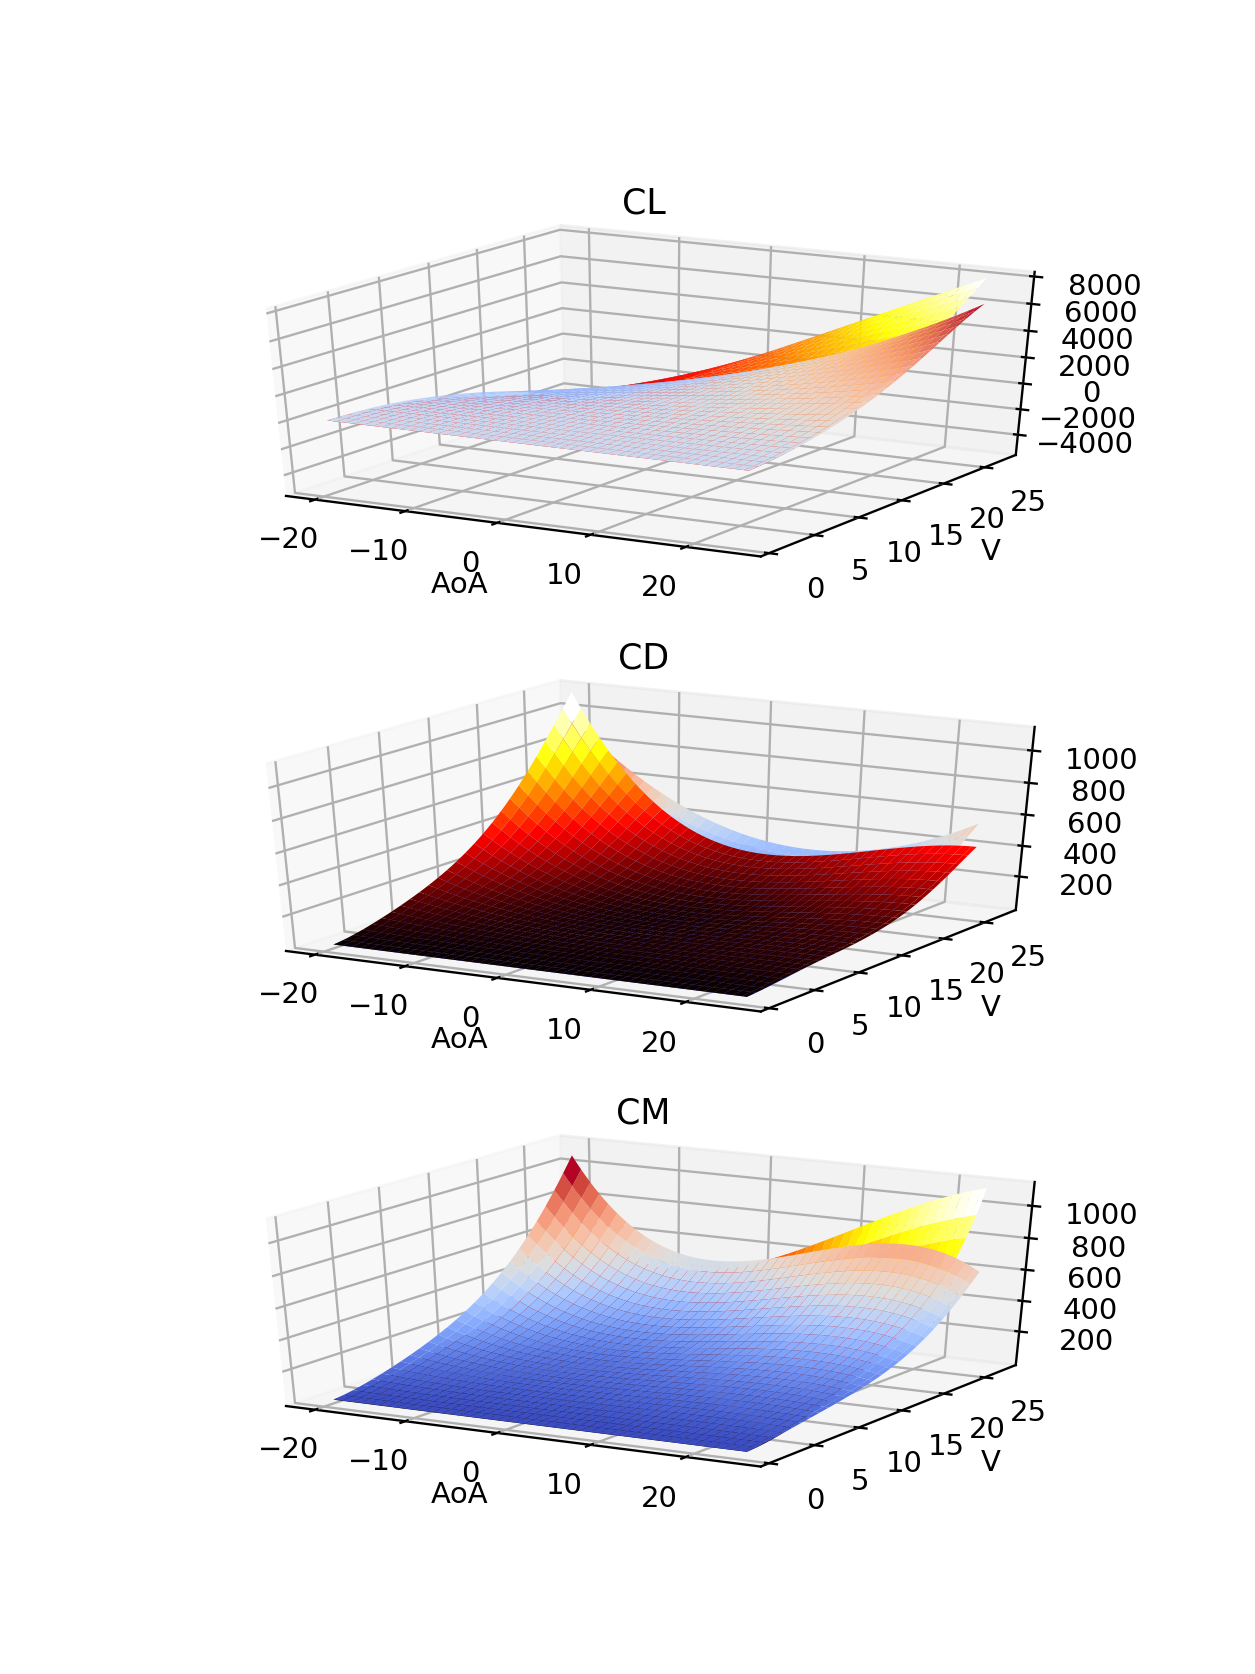

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,8), dpi=150)

ax = fig.add_subplot(311, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = L_vbon
z2 = L_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CL')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')

ax = fig.add_subplot(312, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = D_vbon
z2=D_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CD')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')

ax = fig.add_subplot(313, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = M_vbon
z2=M_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CM')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')



<IPython.core.display.Javascript object>


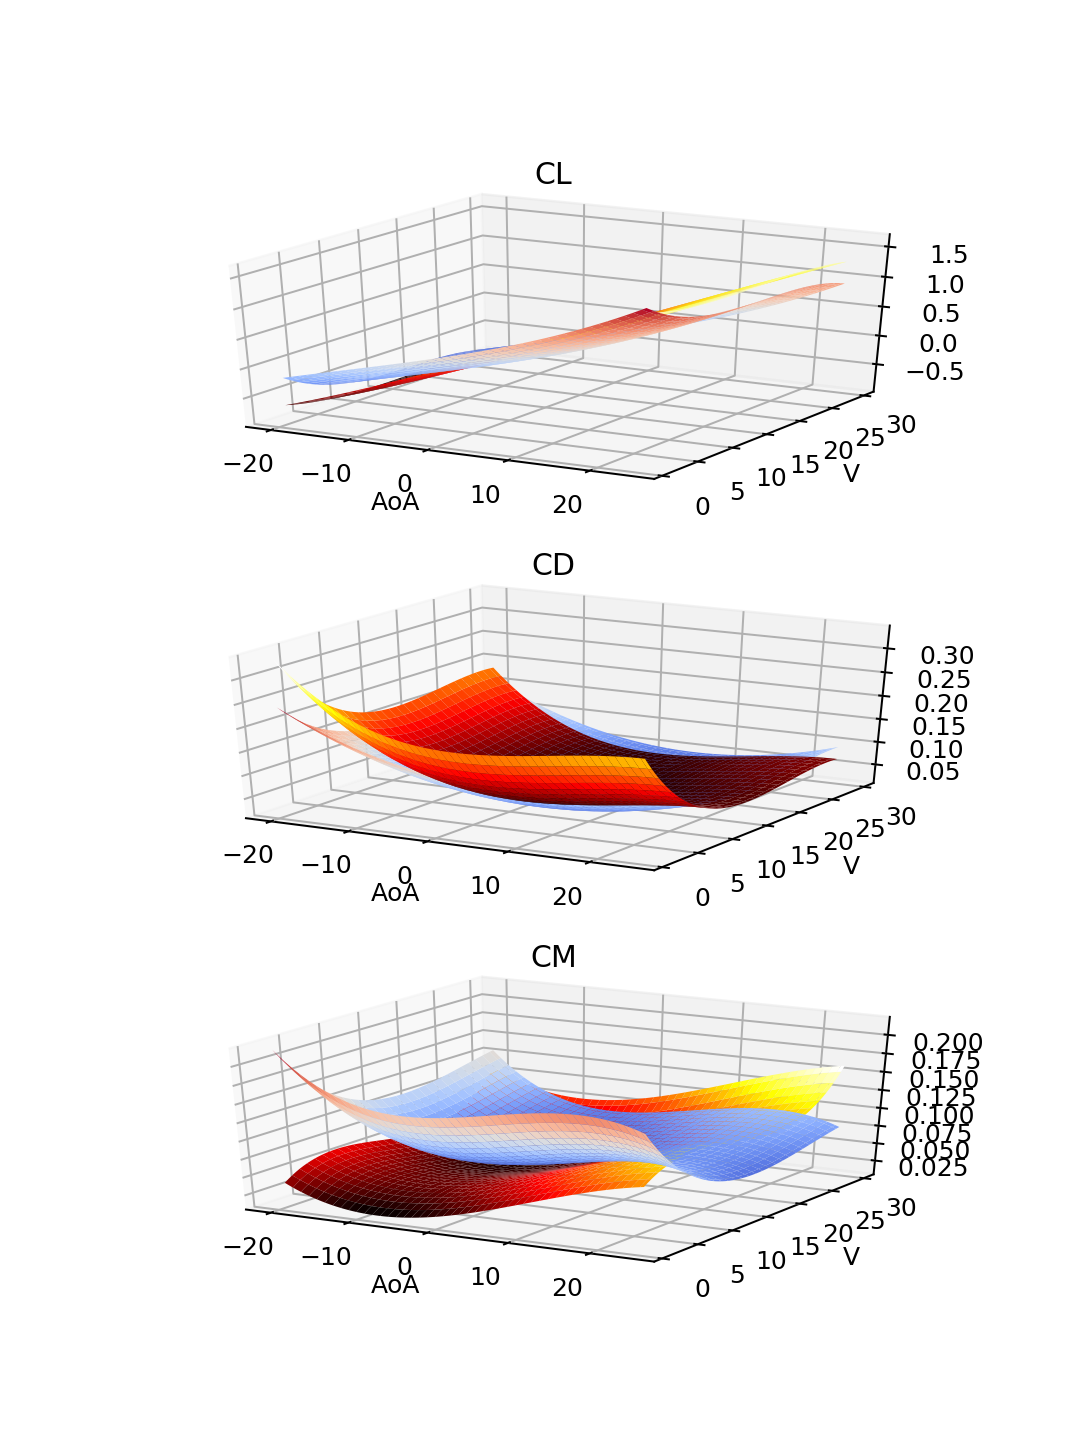

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,8), dpi=150)

ax = fig.add_subplot(311, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = CL
z2 = CL_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CL')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')

ax = fig.add_subplot(312, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = CD
z2=CD_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CD')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')

ax = fig.add_subplot(313, projection='3d')
x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
y = np.full((len(AoA), len(V)), np.array([V]))
y = np.transpose(y)
y = y[:,:len(x[0])]
z = CM
z2=CM_vboff
plt.xlabel('AoA')
plt.ylabel('V')
plt.title('CM')
ax.plot_surface(x, y, z, cmap='hot')
ax.plot_surface(x, y, z2, cmap='coolwarm')



In [69]:
from mayavi import mlab
#mlab.init_notebook()

mlab.figure(0, fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

x = AoAmat
x = np.full((len(V), len(AoA)), np.array([AoA]))
y = Vmat
z1 = L_vbon/500
z2 = L_vboff/500
z3 = D_vbon/100
z4 = D_vboff/100

pts= mlab.points3d(x, y, z1,z1, colormap='hot',mode='2dcircle')
mesh = mlab.pipeline.delaunay2d(pts)
surf = mlab.pipeline.surface(mesh,colormap='hot')

pts= mlab.points3d(x, y, z2,z2,mode='2dcircle')
mesh = mlab.pipeline.delaunay2d(pts)
surf = mlab.pipeline.surface(mesh,colormap='cool')

pts= mlab.points3d(x, y, z3,z3, colormap='hot',mode='2dcircle')
mesh = mlab.pipeline.delaunay2d(pts)
surf = mlab.pipeline.surface(mesh,colormap='hot')

pts= mlab.points3d(x, y, z4,z4,mode='2dcircle')
mesh = mlab.pipeline.delaunay2d(pts)
surf = mlab.pipeline.surface(mesh,colormap='cool')

mlab.xlabel('AoA')
mlab.ylabel('V')
#mlab.zlabel('CL')

mlab.show()
#surf

<IPython.core.display.Javascript object>


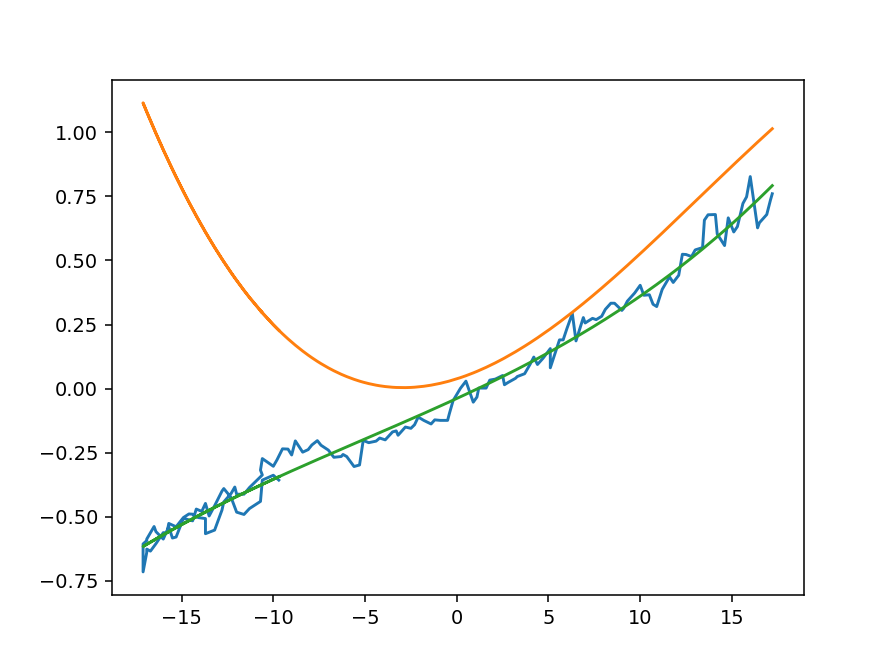

In [114]:
#Comparison to WW equation
# Clift  = -16.6*alpha**3 + 11.48*alpha**2 + 1.3*alpha + 0.038
a=popt[0]
b=popt[1]
c=popt[2]
d=popt[3]
aW=-16.6
bW= 11.48
cW=1.3
dW=0.038


i=1
CLW=[]
CL=[]

for AoA in (vboff_data_Co[i]['Keel_Angle/deg']):
    clW = poly_3(np.radians(AoA),aW,bW,cW,dW)
    cl = poly_3(AoA,a,b,c,d)
    CL.append(cl)
    CLW.append(clW)

plt.figure()
plt.plot(vboff_data_Co[i]['Keel_Angle/deg'],vboff_data_Co[i]['CL'])
plt.plot(vboff_data_Co[i]['Keel_Angle/deg'],CLW)
plt.plot(vboff_data_Co[i]['Keel_Angle/deg'],CL)